# This is just a small sample analysis of the Steam data we've collected and processed

### Table of contents

* Importing data

* Checking tables

* Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

    * Task
    * Reorganizing data
    * Making plots
    * Analyzing the results


In [45]:
# Module imports
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import re
import ast
import itertools

# third-party imports
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Loading data tables
steam = pd.read_csv('../data/export/steam.csv')
missing_ids = pd.read_csv('../data/export/missing_ids.csv')
steam_description_data = pd.read_csv('../data/export/steam_description_data.csv')
steam_media_data = pd.read_csv('../data/export/steam_media_data.csv')
steam_optional = pd.read_csv('../data/export/steam_optional.csv')
steam_packages_info = pd.read_csv('../data/export/steam_packages_info.csv')
steam_requirements_data = pd.read_csv('../data/export/steam_requirements_data.csv')
steam_support_info = pd.read_csv('../data/export/steam_support_info.csv')
steamspy_tag_data = pd.read_csv('../data/export/steamspy_tag_data.csv')

## Let's check our tables:

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102504 entries, 0 to 102503
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   appid                102504 non-null  int64  
 1   type                 102504 non-null  object 
 2   name                 102504 non-null  object 
 3   required_age         102504 non-null  int64  
 4   dlc                  9696 non-null    object 
 5   fullgame             34607 non-null   object 
 6   supported_languages  102352 non-null  object 
 7   developers           102463 non-null  object 
 8   publishers           102464 non-null  object 
 9   packages             81153 non-null   object 
 10  platforms            102504 non-null  object 
 11  categories           102398 non-null  object 
 12  genres               102311 non-null  object 
 13  achievements         102504 non-null  float64
 14  release_date         95676 non-null   object 
 15  supported_audio  

In [4]:
steam.sample(10)

,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,...,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
70891,1420110,dlc,Conqueror's Blade - Soaring Sapphire Collector...,0,NaN,"{'appid': '905370', 'name': ""Conqueror's Blade""}","['English', 'French', 'German', 'Polish', 'Rus...",['Booming Tech'],['MY.GAMES'],[498424],...,False,24.99,4.0,7.0,13.0,40.998789,0-20000,0.0,0.0,NaN
3951,258402,dlc,Rocksmith® 2014 – Foo Fighters - “The Pretender”,0,NaN,"{'appid': '221680', 'name': 'Rocksmith® 2014 E...","['English', 'French', 'German', 'Italian', 'Ja...",['Ubisoft - San Francisco'],['Ubisoft - San Francisco'],[32509],...,False,2.99,0.0,3.0,0.0,67.059371,0-20000,0.0,0.0,"['Casual', 'Simulation']"
88711,1712420,game,Thats Life of Ralph,0,NaN,NaN,"['English', 'Portuguese - Brazil']",['Opala Project'],['Opala Project'],[613189],...,False,1.59,7.0,16.0,1.0,75.636128,0-20000,0.0,0.0,"['Cats', 'Dog', 'Puzzle', 'Tabletop', 'Emotion..."
99882,1928470,game,攻城三国志,0,NaN,NaN,['Simplified Chinese'],['攻城三国志'],['攻城三国志'],NaN,...,False,0.00,0.0,0.0,0.0,50.000000,0-20000,0.0,0.0,NaN
41032,921870,dlc,Apocalipsis: One Night in the Woods,0,NaN,"{'appid': '505330', 'name': 'Apocalipsis'}","['English', 'French', 'German', 'Italian', 'Po...",['Punch Punk Games'],['Klabater'],[297546],...,False,1.59,6.0,10.0,4.0,61.945381,0-20000,0.0,0.0,"['Adventure', 'Indie', 'Casual']"
92228,1778830,game,Skautfold: Knight's End,0,NaN,NaN,['English'],['Steve Gal'],['Pugware'],[638462],...,False,8.19,0.0,5.0,0.0,70.844323,0-20000,0.0,0.0,"['RPG', 'JRPG', 'Turn-Based Tactics', '2D', 'H..."
20284,556130,game,"Drones, The Human Condition",0,NaN,NaN,['English'],['Blunt Games'],['ninjainatux'],[138918],...,False,5.49,0.0,6.0,0.0,72.166351,50000-100000,123.0,240.0,"['Action', 'Indie', 'Arcade', ""Shoot 'Em Up"", ..."
62288,1264250,game,Fishing: North Atlantic - Enhanced Edition,0,[1602660],NaN,"['Danish', 'English', 'Finnish', 'French', 'Ge...",['Misc Games'],['Misc Games'],[439637],...,False,29.99,6.0,1224.0,433.0,71.306122,50000-100000,376.0,439.0,"['Simulation', 'Fishing', 'Open World', 'Naval..."
53644,1127990,game,Hell Firefighter,0,NaN,NaN,"['English', 'Russian']",['Digital Entertainment Novels'],['Denovels'],[383217],...,False,0.79,0.0,1.0,1.0,50.000000,0-20000,0.0,0.0,"['Experimental', 'Racing', 'Pixel Graphics', '..."
33170,783250,game,CONTAINMENT,0,NaN,NaN,"['Arabic', 'English', 'French', 'German', 'Ita...",['Planet X Game Studios'],['Planet X Game Studios'],[236182],...,False,1.59,0.0,0.0,0.0,50.000000,0-20000,0.0,0.0,"['Indie', 'Casual', 'Arcade']"


In [5]:
steam[['name','supported_languages']].sample(10)

,name,supported_languages
5289,Life is Feudal: Your Own,"['Czech', 'English', 'French', 'German', 'Hung..."
74089,[Pre-Order] DeLight: The Journey Home - Chapter 4,"['English', 'Simplified Chinese', 'Traditional..."
90737,First Class Trouble Winter Pack,"['English', 'French', 'German', 'Japanese', 'K..."
30428,Hard West - Printable Posters,"['English', 'French', 'German', 'Polish', 'Rus..."
3535,Redshirt,['English']
35530,BitBreaker,['English']
84137,Magi: Mind Game,['English']
94535,Nobodies: After Death,"['English', 'French', 'German', 'Italian', 'Ja..."
31834,Poker Legends: Texas Hold'em Poker Tournaments,['English']
50524,Super Jigsaw Puzzle: Generations - Winter Puzzles,"['English', 'French', 'German', 'Italian', 'Ja..."


In [6]:
def f(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(str(x))   
    except Exception as e:
        print(e)
        return []
    
temp_df = steam[['name','supported_languages']].copy()
#temp_df['supported_languages'] = temp_df['supported_languages'].fillna("[]")
#temp_df['supported_languages'] = temp_df['supported_languages'].apply(lambda x:f(x))
temp_df['supported_languages'] = temp_df[temp_df['supported_languages'].notnull()]['supported_languages'].apply(eval)
temp_df.explode('supported_languages')

,name,supported_languages
0,Counter-Strike,English
0,Counter-Strike,French
0,Counter-Strike,German
0,Counter-Strike,Italian
0,Counter-Strike,Korean
...,...,...
102503,Bioshock Infinite: Columbia's Finest,Japanese
102503,Bioshock Infinite: Columbia's Finest,Polish
102503,Bioshock Infinite: Columbia's Finest,Portuguese - Brazil
102503,Bioshock Infinite: Columbia's Finest,Russian


In [7]:
missing_ids.sample(10)

,appid,reason
567,NaN,Missing app name
310,NaN,Missing app name
243,NaN,Missing app name
104,NaN,Missing app name
353,NaN,Missing app name
285,NaN,Missing app name
5,63970.0,Steam Storefront Error
406,NaN,Missing app name
594,NaN,Missing app name
173,NaN,Missing app name


In [8]:
steam_description_data.sample(10)

,appid,detailed_description,about_the_game,short_description
46761,1022417,Allows Exdeath to equip Void Sword.<br />\r\n<...,Allows Exdeath to equip Void Sword.<br />\r\n<...,"Void Sword, Exdeath's 4th Weapon"
60709,1240680,Hades Ultimate Fighting Ball is a Multiplayer ...,Hades Ultimate Fighting Ball is a Multiplayer ...,Hades Ultimate Fighting Ball is a multiplayer ...
12150,407700,<strong>Lonath Online</strong> is a <strong>cl...,<strong>Lonath Online</strong> is a <strong>cl...,Lonath Online is a classic Top-Down PvP based ...
15515,467270,Weaves of Fate is a unique and epic blend of i...,Weaves of Fate is a unique and epic blend of i...,Weaves of Fate is a unique and epic blend of i...
15195,462920,"<h2 class=""bb_tag"">NOTE: This pack was origina...","<h2 class=""bb_tag"">NOTE: This pack was origina...",Strike fear into the hearts of your foes with ...
29963,730261,"<h1>Try it!</h1><p><a href=""https://store.stea...",„The heartfelt cosmopolitan city“! With the ne...,„The heartfelt cosmopolitan city“! With the ne...
92501,1786770,"Platform jumping game, By switching the small ...","Platform jumping game, By switching the small ...",A platform jumping gameCore features: high dif...
98780,1908570,LAMBDA end THEORY is a cryptic and minimalist ...,LAMBDA end THEORY is a cryptic and minimalist ...,LAMBDA end THEORY is a cryptic and minimalist ...
6147,305740,<i>Now isn’t this great…! <br>It’s my brother’...,<i>Now isn’t this great…! <br>It’s my brother’...,Enter a seventies science fiction utopia with ...
26249,664130,<strong>同居人の裏の顔を暴け！選択肢で受、攻が決まるBLノベルゲーム「僕と彼の危険な...,<strong>同居人の裏の顔を暴け！選択肢で受、攻が決まるBLノベルゲーム「僕と彼の危険な...,「僕と彼の危険な同居生活」はニューヨークに留学した大学生の陽向が事件に巻き込まれるうちに、一...


In [9]:
steam_media_data.sample(10)

,appid,header_image,screenshots,background,movies
56800,1180150,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
45542,1001870,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256760710, 'name': 'Robovirus', 'thumb..."
37387,860233,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
59424,1218850,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256771246, 'name': 'Escape Rebooted - ..."
1567,92700,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
59440,1219080,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256783427, 'name': 'Dice Tactics Trail..."
21995,586710,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256678533, 'name': ""Witches' Legacy: S..."
75567,1503200,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256819678, 'name': 'HG 1 Base', 'thumb..."
85307,1677650,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256864171, 'name': 'CubeCubeEarlyAcces..."
49232,1063350,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256747235, 'name': 'Main Trailer', 'th..."


In [10]:
steam_optional.sample(10)

,appid,drm_notice,ext_user_account_notice,demos,content_descriptors,metacritic_score,metacritic_url
5600,824600,NaN,NaN,[973020],Not suitable for youth under the age of 30 by ...,NaN,NaN
13401,1323480,NaN,NaN,NaN,"This game features mention of transphobia, dea...",NaN,NaN
10793,1184400,NaN,NaN,NaN,．All characters portrayed in this game are ove...,NaN,NaN
13907,1359430,NaN,NaN,NaN,The developers describe the content like this:...,NaN,NaN
11575,1222330,NaN,NaN,NaN,Animated sexual scenes.\r\nNaked beautiful gir...,NaN,NaN
15247,1447240,NaN,NaN,NaN,The first chapter of the game ‘The Outbreak’ w...,NaN,NaN
21294,1850860,NaN,NaN,NaN,-Suggestive clothing\r\n-Gore,NaN,NaN
15417,1458560,NaN,NaN,NaN,This is a horror game. It contains scary and u...,NaN,NaN
11764,1229380,NaN,NaN,NaN,NaN,83.0,https://www.metacritic.com/game/pc/everhood?ft...
14556,1398680,NaN,NaN,NaN,This game includes adult content between two w...,NaN,NaN


In [11]:
steam_packages_info.sample(10)

,appid,type,title,is_recurring_subscription,subs
214,7940,default,Buy Call of Duty® 4: Modern Warfare®,False,"[{'packageid': 542, 'percent_savings_text': ' ..."
25856,698040,default,Buy Legends of the Universe - Cosmic Bounty,False,"[{'packageid': 200670, 'percent_savings_text':..."
11857,414770,default,Buy Bionite: Origins,False,"[{'packageid': 83337, 'percent_savings_text': ..."
30264,788700,default,Buy ValeGuard,False,"[{'packageid': 238417, 'percent_savings_text':..."
51180,1210091,default,Buy Zaccaria Pinball - Zombie Invasion Mode,False,"[{'packageid': 418201, 'percent_savings_text':..."
22538,629021,default,Buy Legal Action Pending DLC - Retail Edition,False,"[{'packageid': 171003, 'percent_savings_text':..."
14738,474210,default,Buy BUTCHER,False,"[{'packageid': 105285, 'percent_savings_text':..."
40807,1007230,default,Buy VRLab Academy Anatomy VR,False,"[{'packageid': 333186, 'percent_savings_text':..."
70975,1685398,default,Buy Tiger Tank 59 Ⅰ Black Hill Fortress MP049,False,"[{'packageid': 599974, 'percent_savings_text':..."
16636,513580,default,Buy Miaou Moon,False,"[{'packageid': 119731, 'percent_savings_text':..."


In [12]:
steam_requirements_data.sample(10)

,appid,pc_requirements,mac_requirements,linux_requirements,pc_minimum,pc_recommended,mac_minimum,mac_recommended
18900,999550,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating system
23366,1174510,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system
19313,1015680,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],OS: Windows 7 64bit Processor: Intel 'i' serie...,NaN,OS: 10.9 Processor: i5 2 Ghz Memory: 6 GB RAM ...,NaN
22884,1158840,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system
32118,1515900,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating system
10681,672140,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,"OS: Windows 7, 8, 10 Processor: 1.5 Ghz Memory...",NaN,OS: OS X 10.0 Processor: Core i5 Memory: 4 GB ...,NaN
27511,1333430,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating system
32075,1514380,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating system,Requires a 64-bit processor and operating system
42027,1971750,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],OS: Microsoft® Windows® Vista / 7 / 8/ 8.1/ 10...,NaN,OS: Mac OS X 10.9 - 12.0 Processor: 1.5 GHz In...,NaN
7027,520670,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],OS: Windows 7 Processor: Core 2 Duo or equival...,NaN,OS: OSX 10.9+ Processor: 2 GHz Memory: 4 GB RA...,NaN


In [13]:
steam_support_info.sample(10)

,appid,website,support_url,support_email
66542,1354814,http://www.rpgmakerweb.com/,http://www.rpgmakerweb.com/support,NaN
52289,1116580,https://shady-part-of.me/,http://www.focus-home.com/support,support@focus-home.com
58184,1206685,http://www.waw-games.com/,NaN,support@waw-games.com
8207,345660,http://ridevideogame.com/,http://milestone.it/contacts/support/?lang=en,NaN
58526,1211630,NaN,http://help.jackboxgames.com,support@jackboxgames.com
10088,376934,http://www.train-simulator.com,http://dovetailgames.kayako.com,NaN
47331,1036794,NaN,NaN,games@degica.com
84181,1667827,http://www.tigerqiuqiu.com,http://www.tigerqiuqiu.com,support@tigerqiuqiu.com
3379,250520,http://www.underrail.com,http://www.underrail.com/forums/,admin@underrail.com
36951,858630,https://www.maulidangames.com,http://www.maulidangames.com,contact@maulidangames.com


In [14]:
steamspy_tag_data.sample(10)

,appid,1980s,1990s,2.5d,2d,2d_fighter,2d_platformer,360_video,3d,3d_fighter,...,web_publishing,well_written,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
3757,253840,0,0,37,81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86230,1687809,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80300,1583690,0,0,0,381,0,0,0,0,0,...,0,0,0,0,0,0,0,0,341,0
69633,1397690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74524,1482530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27771,688820,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56552,1175100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43168,957110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36700,846860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88376,1707490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

## Task

* Determine how popular are Sci-Fi RPGs comparing to the Fantasy ones
    * Number of owners and number of games
    * Total number of tags and tags present
    * Real-time vs Turn-based
    * Changes over time
    

*Keep in mind, SteamSpy owners data is an estimate and might be quite different from the real game owner counts*

## Reorganizing data

### We'll need this data:

#### From steam:
* appid
* name
* type: game
* genres: RPG
* release_date
* coming_soon: False
* rating
* total_positive+total_negative
* owners: get average
* tags: filter by "Fantasy" "Sci-fi" "Cyberpunk"

#### From steamspy_tag_data:
* appid
* tags

In [15]:
# setting indexes
steam = steam.set_index("appid")
steamspy_tag_data = steamspy_tag_data.set_index("appid")

In [16]:
# filtering out the unneeded data part 1
analysis_df = steam[(steam["type"] == "game") 
                    & (steam["coming_soon"] == False)][["name",
                                                        "genres",
                                                        "release_date",
                                                        "rating","total_positive",
                                                        "total_negative",
                                                        "owners",
                                                        "tags"]].copy()
# unwrapping strings -> list
analysis_df['genres'] = analysis_df[analysis_df['genres'].notnull()]['genres'].apply(eval)
analysis_df['tags'] = analysis_df[analysis_df['tags'].notnull()]['tags'].apply(eval)
# setting some columns format
# total reviews
analysis_df['total_reviews'] = analysis_df['total_positive'] + analysis_df['total_negative']
# converting release_date
analysis_df['release_date'] = analysis_df['release_date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
def parse_owners(owners_str):
    owners_split = owners_str.split('-')
    result = (int(owners_split[0]) + int(owners_split[1])) // 2
    return result
# average owners
analysis_df["owners"] = analysis_df["owners"].apply(lambda x: 0 if x != x else parse_owners(x))

In [17]:
# genres values
analysis_df.genres.explode().value_counts(dropna=False)

Indie                    40367
Action                   23721
Casual                   23233
Adventure                21633
Simulation               10999
Strategy                 10748
RPG                       9632
Early Access              5994
Free to Play              4313
Sports                    2604
Racing                    2056
Massively Multiplayer     1444
Violent                    490
Gore                       290
Nudity                     113
Sexual Content             103
NaN                         95
Education                   20
Utilities                   11
Design & Illustration        8
Game Development             7
Software Training            6
Audio Production             5
Animation & Modeling         5
Web Publishing               4
Accounting                   3
Video Production             3
Movie                        2
Photo Editing                1
Documentary                  1
Episodic                     1
Short                        1
Tutorial

In [18]:
# filtering out genres
analysis_df.dropna(subset=['genres'], how='all', inplace = True)
genres_mask = analysis_df.genres.apply(lambda x: 'RPG' in x)

analysis_df = analysis_df[genres_mask]

In [19]:
# tags values
temp_df = analysis_df.dropna(subset=['tags'], how='all')
temp_df = temp_df.explode('tags')
temp_df['tags'].unique()

array(['RPG', 'First-Person', 'Classic', 'Atmospheric', 'Dark Fantasy',
       'Fantasy', 'Singleplayer', 'Immersive Sim', 'Underground',
       'Adventure', 'Action', 'Story Rich', 'Exploration', 'Magic',
       'Dungeon Crawler', 'Horror', 'Action RPG', 'Stealth', 'Open World',
       'Inventory Management', 'Third Person', 'Multiplayer', 'Medieval',
       'Character Customization', 'Hack and Slash', 'Co-op', 'Swordplay',
       'Multiple Endings', 'Gore', 'Indie', 'Mystery', 'Assassin',
       'Funny', 'Survival', 'Simulation', 'FPS', 'Comedy', 'Shooter',
       'Strategy', 'Difficult', 'Stylized', 'Replay Value', 'Puzzle',
       'Turn-Based Strategy', 'Female Protagonist', 'Turn-Based',
       'Hex Grid', 'Tactical', 'Turn-Based Combat', 'Tactical RPG',
       'Great Soundtrack', 'Pirates', 'Naval', 'Sandbox', 'Sailing',
       'Historical', 'Economy', 'Remake', 'Trading', 'Naval Combat',
       'Choose Your Own Adventure', 'Fighting', 'Loot',
       'Post-apocalyptic', 'Survival

In [20]:
# processing tags - removing tagless->exploding->filtering out rows we don't need
# removing rows without tags
analysis_df.dropna(subset=['tags'], how='all', inplace = True)
# exploding
analysis_df = analysis_df.explode('tags')

In [21]:
# filtering out all the tags we don't need
tags_list =["Anime", "Cyberpunk", "Dark Fantasy", "Fantasy", "Horror", "Medieval", "Space", "Sci-fi"]
analysis_df = analysis_df[analysis_df['tags'].isin(tags_list)]

In [22]:
analysis_df

,name,genres,release_date,rating,total_positive,total_negative,owners,tags,total_reviews
appid,,,,,,,,,
1700,Arx Fatalis,[RPG],2007-04-03,83.058079,1208.0,176.0,350000,Dark Fantasy,1384.0
1700,Arx Fatalis,[RPG],2007-04-03,83.058079,1208.0,176.0,350000,Fantasy,1384.0
1700,Arx Fatalis,[RPG],2007-04-03,83.058079,1208.0,176.0,350000,Horror,1384.0
1930,Two Worlds Epic Edition,[RPG],2009-04-30,73.400235,1605.0,507.0,1500000,Fantasy,2112.0
1930,Two Worlds Epic Edition,[RPG],2009-04-30,73.400235,1605.0,507.0,1500000,Medieval,2112.0
...,...,...,...,...,...,...,...,...,...
1958230,LOONY,"[Casual, Indie, RPG, Strategy, Early Access]",2022-04-26,55.686457,2.0,1.0,10000,Horror,3.0
1960790,Battle of Heroes 3,"[Adventure, Free to Play, Indie, Massively Mul...",2022-04-23,44.313543,1.0,2.0,10000,Medieval,3.0
1960790,Battle of Heroes 3,"[Adventure, Free to Play, Indie, Massively Mul...",2022-04-23,44.313543,1.0,2.0,10000,Fantasy,3.0


It looks like we don't have many games left. 

On the first look, it seems like that's because a lot of our games don't have the user tags. But let's see how many of these games are important by filtering out non-released games, games without the price or reviews:

In [23]:
steam[(steam["tags"].isnull()) 
      & (steam["type"] == "game") 
      & (steam["coming_soon"] == False) 
      & (steam["price"].notnull()) 
      & (steam["total_positive"]+steam["total_negative"] > 0)]

,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,...,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
appid,,,,,,,,,,,,,,,,,,,,,
34330,game,Total War: SHOGUN 2,0,"[223180, 201279, 201277, 34348, 34342, 34343, ...",NaN,"['Czech', 'English', 'French', 'German', 'Ital...","['CREATIVE ASSEMBLY', 'Feral Interactive (Mac)...","['SEGA', 'Feral Interactive (Mac)', 'Feral Int...","[7587, 18408]","['windows', 'mac', 'linux']",...,False,29.99,8.0,24105.0,2196.0,89.704829,NaN,NaN,NaN,NaN
35030,game,Championship Manager 2010,0,NaN,NaN,"['English', 'French', 'Italian', 'Polish', 'Sp...",['Beautiful Game Studios'],['Square Enix'],[2202],['windows'],...,False,6.99,6.0,85.0,22.0,72.247988,0-20000,0.0,0.0,NaN
37360,game,Mahjong Roadshow™,0,NaN,NaN,['English'],['PlayFirst'],['PlayFirst'],[4041],"['windows', 'mac']",...,False,5.99,0.0,4.0,3.0,53.323284,0-20000,0.0,0.0,NaN
42680,game,Call of Duty®: Modern Warfare® 3,18,"[42698, 42697, 42696, 42695]",NaN,"['English', 'French', 'German', 'Italian', 'Sp...","['Infinity Ward', 'Sledgehammer Games']",['Activision'],"[12205, 49978, 49981]",['windows'],...,False,39.99,8.0,7978.0,1129.0,85.185720,NaN,NaN,NaN,NaN
56400,game,"Warhammer 40,000: Dawn of War II: Retribution",18,"[378041, 378040, 56431, 56432, 56433, 56434, 5...",NaN,"['Czech', 'English', 'French', 'German', 'Ital...","['Relic Entertainment', 'Feral Interactive (Ma...","['SEGA', 'Feral Interactive (Mac/Linux)']","[7431, 44367, 30561, 44370, 116764]","['windows', 'mac', 'linux']",...,False,29.99,8.0,5460.0,608.0,87.076111,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953970,game,MATH EXPRESSions,0,[1976070],NaN,['English'],['Mandinga'],['Mandinga'],NaN,['windows'],...,False,0.00,0.0,1.0,0.0,59.416365,0-20000,0.0,0.0,NaN
1957060,game,NTR Dream,0,NaN,NaN,['English'],['Byaka Games'],['Byaka Games'],[705938],"['windows', 'mac', 'linux']",...,False,8.19,0.0,2.0,6.0,37.902813,0-20000,0.0,0.0,NaN
1962440,game,Memory Puzzle - Bad Girl,0,NaN,NaN,['English'],['EroticGamesClub'],['EroticGamesClub'],[708540],['windows'],...,False,1.59,0.0,1.0,0.0,59.416365,0-20000,0.0,0.0,NaN


Total positive reviews for these games:

In [24]:
temp_df = steam[(steam["tags"].isnull()) 
              & (steam["type"] == "game") 
              & (steam["coming_soon"] == False) 
              & (steam["price"].notnull()) 
              & (steam["total_positive"]+steam["total_negative"] > 0)]
print("Total reviews for selection:",temp_df["total_positive"].sum()+temp_df["total_negative"].sum())
print("Total games for selection:",temp_df["name"].count())

Total reviews for selection: 266703.0
Total games for selection: 1856


Doesn't seem like we have a lot of them but it might be a good idea to find a different way of working with these games in the future

In [25]:
analysis_df.groupby('tags').agg(total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'))

,total_owners,average_owners,median_owners,total_games,total_reviews
tags,,,,,
Anime,177115000,109600.866337,10000.0,1616,1745118.0
Cyberpunk,50520000,273081.081081,35000.0,185,678781.0
Dark Fantasy,177480000,322690.909091,10000.0,550,2305649.0
Fantasy,691020000,288767.237777,10000.0,2393,4799441.0
Horror,157705000,252732.371795,35000.0,624,1338253.0
Medieval,135580000,220097.402597,10000.0,616,1848150.0
Sci-fi,267720000,386320.346320,35000.0,693,2650370.0
Space,96510000,319569.536424,35000.0,302,481216.0


## Making plots


### Boxplots

#### Owners

In [82]:
# getting tags
tags = analysis_df["tags"].unique().tolist()

In [26]:
analysis_df.owners.value_counts()

10000       3399
35000       1221
75000        705
150000       554
350000       517
750000       302
1500000      149
3500000      100
7500000       16
15000000       8
35000000       7
75000000       1
Name: owners, dtype: int64

In [33]:
temp_df = analysis_df[analysis_df["tags"] == "Fantasy"]
temp_df.sort_values(by = "owners", ascending = False)

,name,genres,release_date,rating,total_positive,total_negative,owners,tags,total_reviews
appid,,,,,,,,,
1063730,New World,"[Action, Adventure, Massively Multiplayer, RPG]",2021-09-28,67.272283,131767.0,62793.0,75000000,Fantasy,194560.0
1245620,ELDEN RING,"[Action, RPG]",2022-02-24,89.204677,332613.0,36755.0,35000000,Fantasy,369368.0
1468810,鬼谷八荒 Tale of Immortal,"[Action, Adventure, Indie, RPG, Simulation, Ea...",2021-01-27,52.964776,91090.0,80630.0,35000000,Fantasy,171720.0
238960,Path of Exile,"[Action, Adventure, Free to Play, Indie, Massi...",2013-10-23,87.303061,998.0,81.0,35000000,Fantasy,1079.0
292030,The Witcher® 3: Wild Hunt,[RPG],2015-05-18,96.589175,542175.0,14049.0,15000000,Fantasy,556224.0
...,...,...,...,...,...,...,...,...,...
1164480,Killer Gin,[RPG],2020-10-25,68.145781,7.0,1.0,10000,Fantasy,8.0
1162920,Time of the Moon,"[Adventure, Indie, RPG]",2019-11-01,70.844323,5.0,0.0,10000,Fantasy,5.0
1162010,奇幻与砍杀2 Fantasy & Blade Ⅱ,"[Action, Adventure, Casual, Indie, RPG, Strategy]",2019-10-08,68.910053,81.0,27.0,10000,Fantasy,108.0


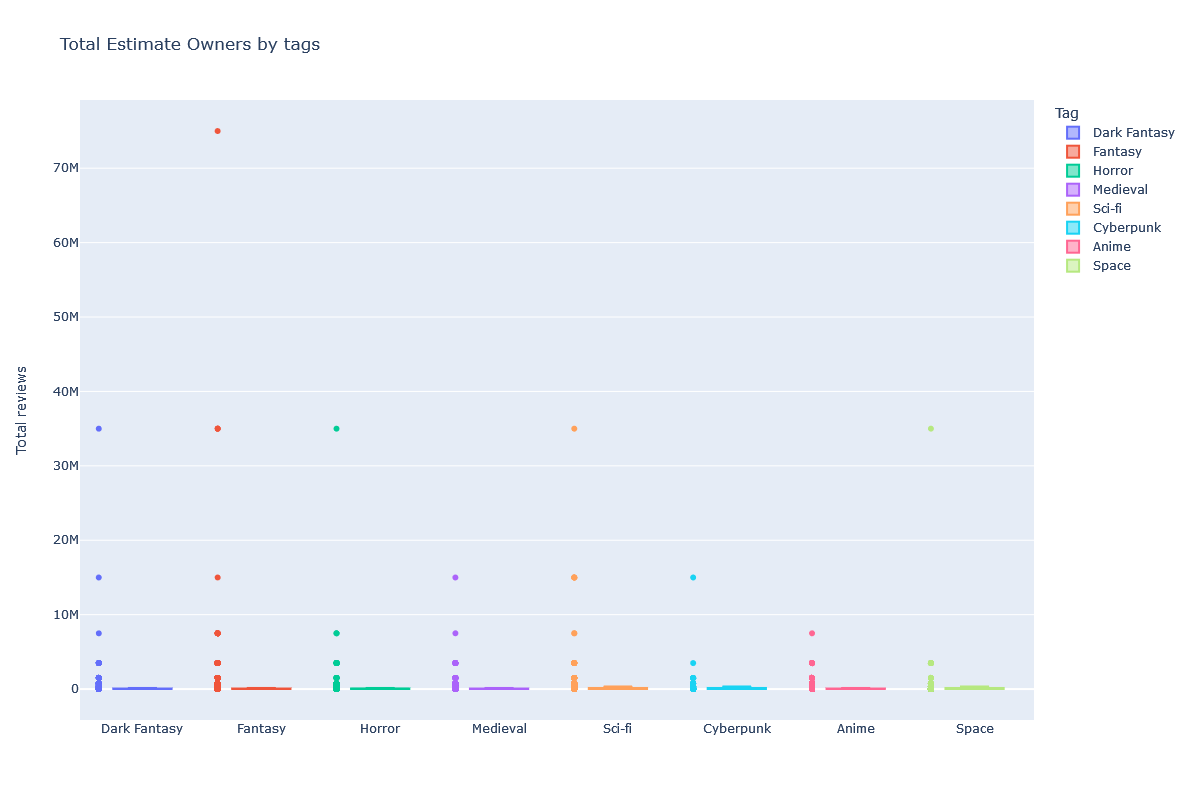

In [91]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["owners"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Owners: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Estimate Owners by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Reviews

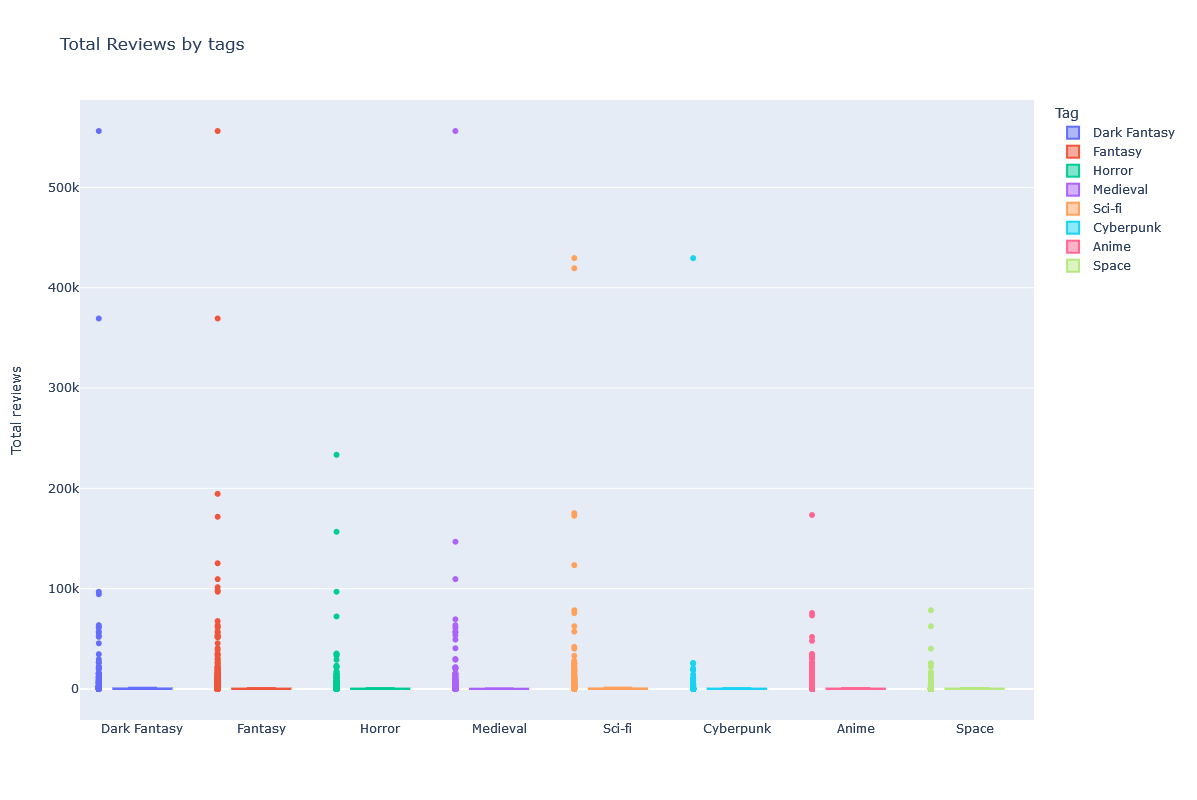

In [84]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["total_reviews"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Reviews: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Reviews by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Ratings

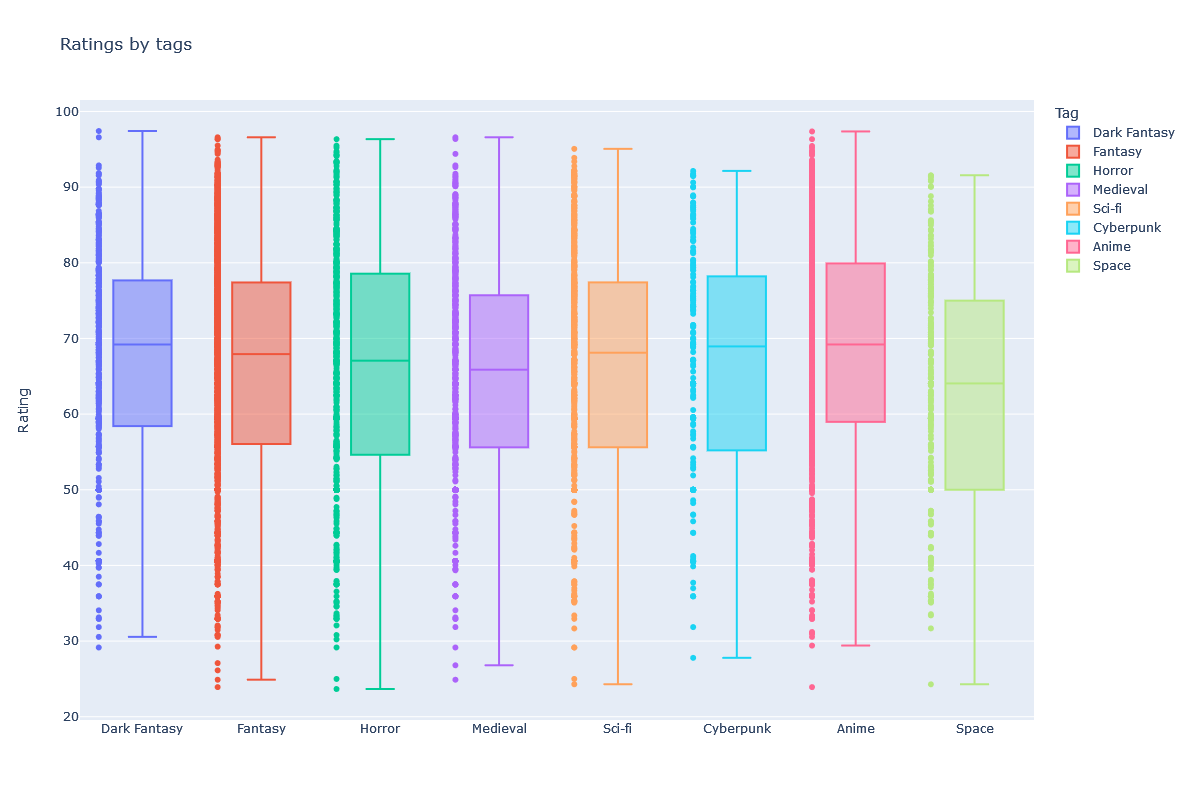

In [80]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["rating"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Rating: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Ratings by tags",
    yaxis_title="Rating",
    legend_title="Tag",
    height=800
    )
    
fig.show()

### Timelines

#### Owners

#### Reviews

## Analyzing the results

## Random snippets

In [89]:
analysis_df[analysis_df["tags"]=="Space"].sort_values(by="total_reviews", ascending=False).head(50)

,name,genres,release_date,rating,total_positive,total_negative,owners,tags,total_reviews
appid,,,,,,,,,
211820,Starbound,"[Action, Adventure, Casual, Indie, RPG]",2016-07-22,90.031594,71796.0,6735.0,3500000,Space,78531.0
359320,Elite Dangerous,"[Action, Adventure, Massively Multiplayer, RPG...",2015-04-02,75.881753,48096.0,14490.0,3500000,Space,62586.0
17390,SPORE™,"[Action, Adventure, Casual, RPG, Simulation, S...",2008-12-19,90.099514,36913.0,3289.0,3500000,Space,40202.0
1328670,Mass Effect™ Legendary Edition,"[Action, RPG]",2021-05-14,91.394356,23994.0,1685.0,750000,Space,25679.0
261640,Borderlands: The Pre-Sequel,"[Action, RPG]",2014-10-16,81.771502,21135.0,4223.0,3500000,Space,25358.0
32370,STAR WARS™ - Knights of the Old Republic™,"[Adventure, RPG]",2009-09-05,88.808317,20022.0,2024.0,1500000,Space,22046.0
208580,STAR WARS™ Knights of the Old Republic™ II - T...,[RPG],2012-08-23,91.033803,15809.0,1127.0,1500000,Space,16936.0
578650,The Outer Worlds,[RPG],2020-10-23,83.631561,14100.0,2383.0,750000,Space,16483.0
17460,Mass Effect (2007),"[Action, RPG]",2008-12-19,91.434592,13298.0,863.0,1500000,Space,14161.0
